In [1]:
#IMPORT THE LIBRARIES
import numpy as np # used for numerical analysis
import pandas as pd # used for data manipulation
from collections import Counter as c # return counts
import seaborn as sns # used for data visualization
import matplotlib.pyplot as plt # used for data visualization(plotting graph)
from sklearn.model_selection import train_test_split# splits data in random train and test array
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error # model performance
import pickle # Pyhton object hierarchy is converted into a byte stream
from sklearn.linear_model import LinearRegression #Regreassion ML algorithm

In [2]:
#READING THE DATASET
data = pd.read_csv('concrete.csv') # loading the csv dataset

In [3]:
# UNDERSTANDING THE DATA
type(data)

pandas.core.frame.DataFrame

In [4]:
data.tail() # returns last 5 rows of the data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [5]:
data.head() # returns first 5 rows of the data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
# rename columns which have only the name
data.columns = [col[:col.find("(")].strip() for col in data.columns] #all lengthy column names are shortened by finding “(“ 
                                                                     #and stripping(or deleting) the unnecessary text from  
                                                                     #column names.

In [7]:
data.info() # info will give you a summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement                           1030 non-null float64
Blast Furnace Slag               1030 non-null float64
Fly Ash                          1030 non-null float64
Water                            1030 non-null float64
Superplasticizer                 1030 non-null float64
Coarse Aggregate                 1030 non-null float64
Fine Aggregate                   1030 non-null float64
Age                              1030 non-null int64
Concrete compressive strength    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
data.describe() # returns description of the data in the DataFrame

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [9]:
#HANDLING MISSING VALUES
data.isnull().any() # it will return true if any column is havinf null value

Cement                           False
Blast Furnace Slag               False
Fly Ash                          False
Water                            False
Superplasticizer                 False
Coarse Aggregate                 False
Fine Aggregate                   False
Age                              False
Concrete compressive strength    False
dtype: bool

In [10]:
data.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

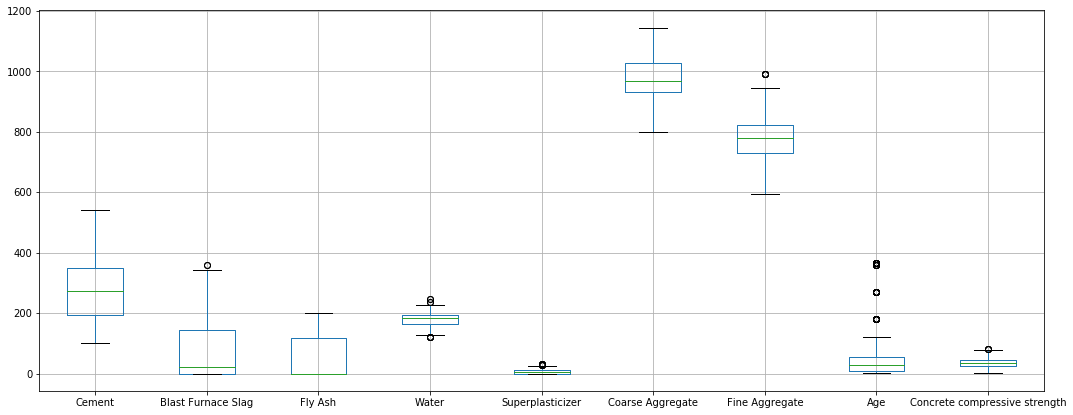

In [11]:
# DATA VISUALIZATION
data.boxplot(figsize=(18,7)) # detecting the outliers using boxplot

In [12]:
# SPLIT THE DATA INTO INDEPENDENT AND DEPENDENT VARIABLES
x=pd.DataFrame(data,columns=data.columns[:8]) #independent columns
y=pd.DataFrame(data,columns=data.columns[8:]) #dependent columns

In [13]:
#SPLIT THE DATASET INTO TRAIN SET AND TEST SET
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [14]:
#TRAINING AND TESTING THE MODEL
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor() #object of GradientBoostingRegressor
gbr.fit(x_train,y_train) #training our data using fit method

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [15]:
y_pred=gbr.predict(x_test) #predicting using predict method
print("Prediction made by Gradient Boosting model : ",y_pred)

Prediction made by Gradient Boosting model :  [21.95234148 13.08162009 24.70391082 11.32025646 34.80947116 64.77465613
 18.45044902 48.72305133 40.43710467 20.12460115 38.64180627 14.73181983
 37.33435548 31.47690119  8.39548073 28.19448467 38.81451032 60.80235308
 55.41349105 36.17514766 22.09653922 50.34586419 17.54229031 59.22520866
 60.28299988 39.18419497 33.47870521 29.62105842 35.97574895 13.79206845
 42.2242261  54.78728341 27.06673021 24.87332946 34.92824549 39.36193638
 16.50942869 26.70669935 25.92994908 14.78114178 39.53782087 13.46243396
 47.04232237 38.96167764 35.78935294 27.67350801 33.28586165 27.08849056
 34.08139794 51.48267971 25.15450245 35.37386967 61.10296174 53.1944813
 56.51847802  8.85042266 38.02781274 22.95231442 32.99320901 44.64324648
 49.32434581 41.57929522 52.63226021 49.50361013 22.7962381  34.73179197
 48.47116198 35.05219693 40.66955402 27.65021804 29.83790459 27.00297825
 39.36193638 12.80090167 67.55248442 58.04726327 53.09303053 14.88848036
 60.33

In [16]:
#MODEL EVALUATION
score=gbr.score(x_test,y_test)
print("Score of Gradient Boosting model : ",score)

Score of Gradient Boosting model :  0.885770424482433


In [18]:
from sklearn import metrics #importing the metrics library
print("MAE : ",metrics.mean_absolute_error(y_test,y_pred)) #Mean Absolute error
print("MSE : ",metrics.mean_squared_error(y_test,y_pred)) #Mean squared error
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_test,y_pred))) #Root mean Square error

MAE :  3.8350605358376098
MSE :  29.7790311873429
RMSE : 5.457016692969053


In [67]:
#SAVE THE MODEL
#dumping our model in pickle format
pickle.dump(gbr, open('cement.pkl','wb')) #gbr is our gradient boosting regression class saved as, “cement.pkl” file. Wb 
                                          #is the write binary in bytes